In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [89]:
tech_list = ['WOW', 'CBA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [90]:
company_list = [WOW, CBA]
company_name = ['WOW', 'CBA']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-05-03,0.090,0.090,0.090,0.090,0.0,0.090,CBA
2021-05-04,0.090,0.090,0.090,0.090,0.0,0.090,CBA
2021-05-05,0.095,0.095,0.095,0.095,16000.0,0.095,CBA
2021-05-06,0.095,0.095,0.095,0.095,3000.0,0.095,CBA
2021-05-07,0.085,0.085,0.085,0.085,4000.0,0.085,CBA
2021-05-10,0.085,0.085,0.085,0.085,500.0,0.085,CBA
2021-05-11,0.085,0.085,0.085,0.085,0.0,0.085,CBA
2021-05-12,0.085,0.085,0.085,0.085,0.0,0.085,CBA
2021-05-13,0.085,0.085,0.085,0.085,0.0,0.085,CBA


In [91]:
df.dtypes

High            float64
Low             float64
Open            float64
Close           float64
Volume          float64
Adj Close       float64
company_name     object
dtype: object

In [92]:
df.isna()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-05-18,False,False,False,False,False,False,False
2020-05-19,False,False,False,False,False,False,False
2020-05-20,False,False,False,False,False,False,False
2020-05-21,False,False,False,False,False,False,False
2020-05-22,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2021-05-10,False,False,False,False,False,False,False
2021-05-11,False,False,False,False,False,False,False
2021-05-12,False,False,False,False,False,False,False


In [93]:
df.isna().sum()

High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
company_name    0
dtype: int64

In [94]:
WOW.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,9.214383,8.759805,8.975498,8.997291,3.393622e+05,8.997291
std,3.892517,3.681322,3.793239,3.793674,3.462429e+05,3.793674
min,4.990000,4.720000,4.720000,4.760000,4.700000e+04,4.760000
25%,5.915000,5.550000,5.700000,5.725000,1.928500e+05,5.725000
50%,7.070000,6.720000,6.890000,6.830000,2.595000e+05,6.830000
75%,12.403000,11.660000,11.725000,12.285000,3.708000e+05,12.285000
max,18.200001,16.889999,18.110001,17.910000,3.922500e+06,17.910000


In [95]:
CBA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,0.129798,0.126053,0.128138,0.127773,19999.190283,0.127773
std,0.031130,0.027566,0.029453,0.028887,48743.145436,0.028887
min,0.080000,0.080000,0.080000,0.080000,0.000000,0.080000
25%,0.105000,0.105000,0.105000,0.105000,0.000000,0.105000
50%,0.120000,0.120000,0.120000,0.120000,500.000000,0.120000
75%,0.147500,0.140000,0.140000,0.145000,15050.000000,0.145000
max,0.265000,0.200000,0.265000,0.260000,415700.000000,0.260000


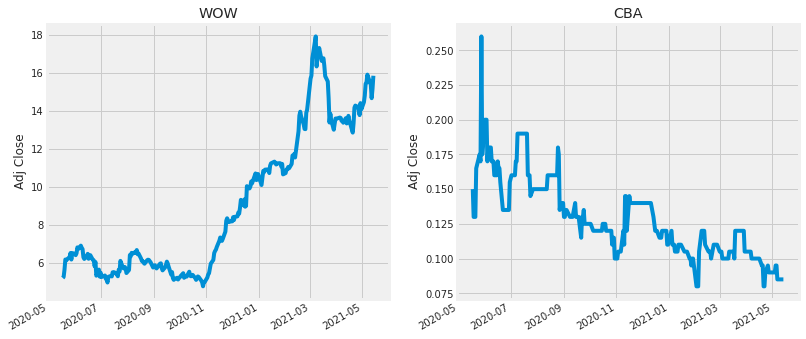

In [96]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

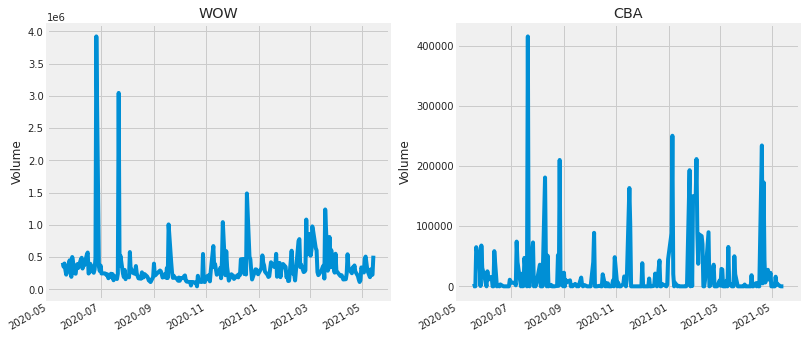

In [97]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

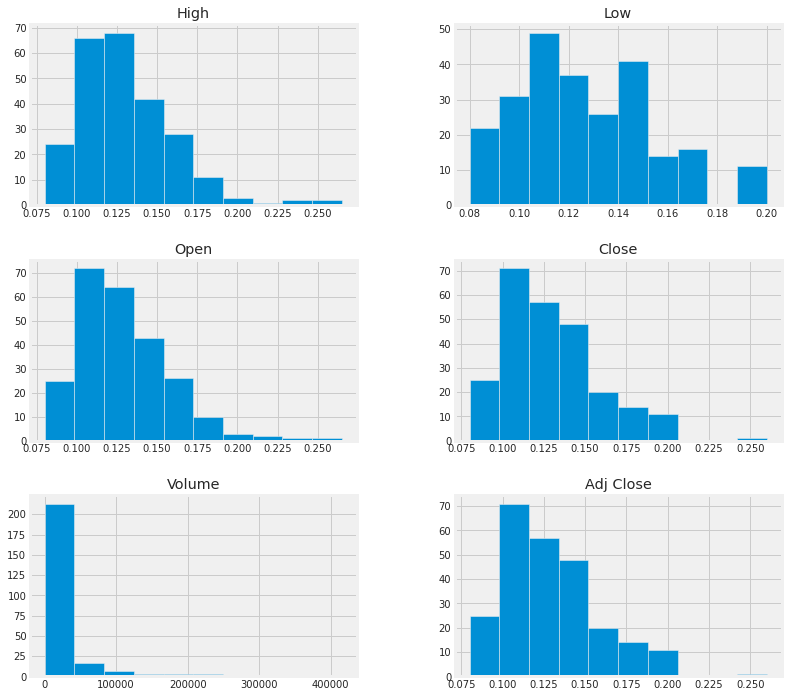

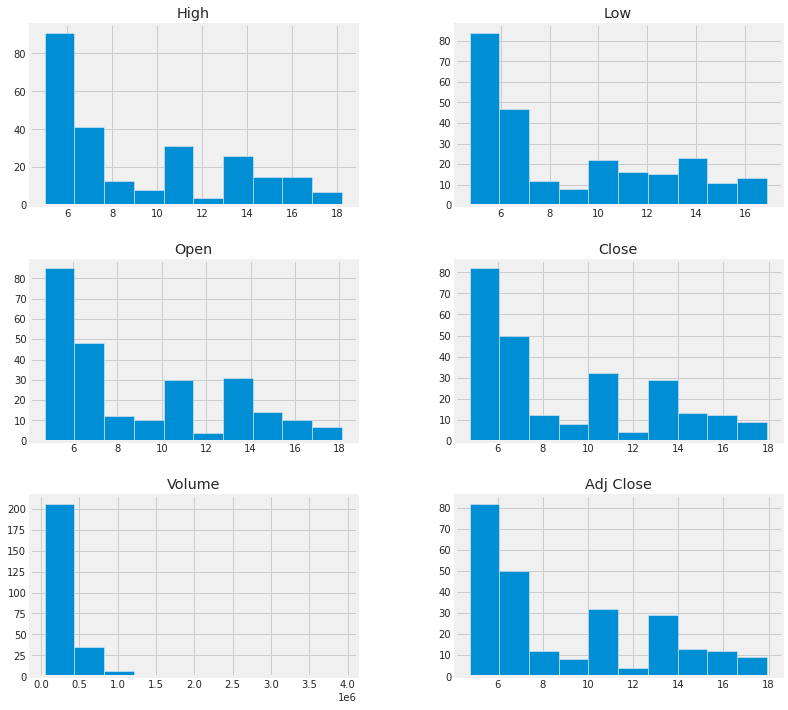

In [98]:
df.groupby("company_name").hist(figsize=(12, 12));

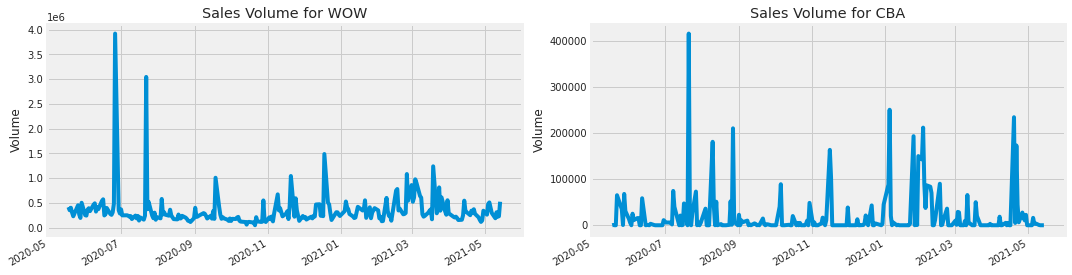

In [99]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [100]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

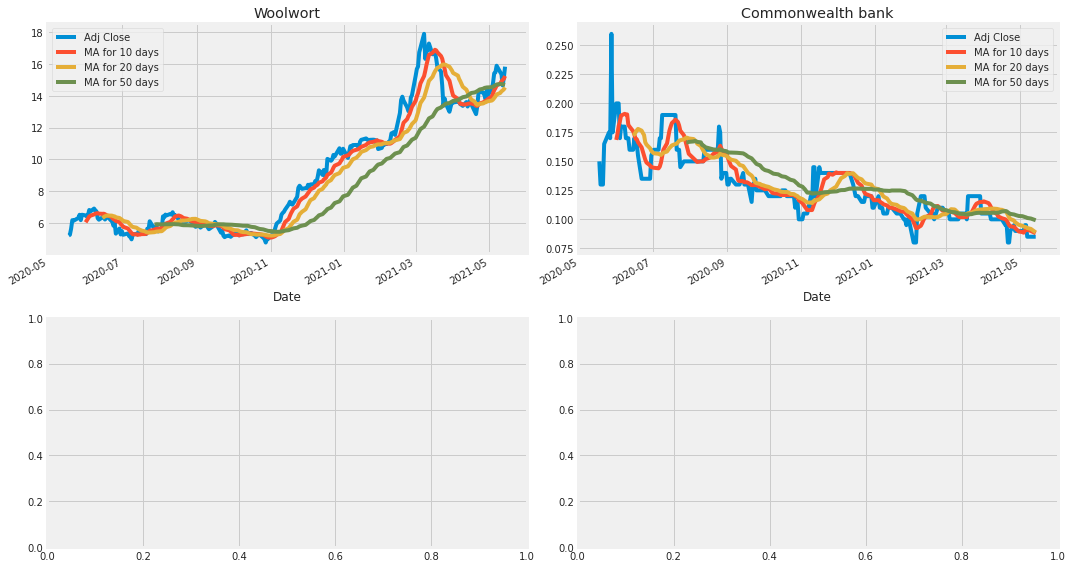

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

WOW[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Woolwort')

CBA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Commonwealth bank')


fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


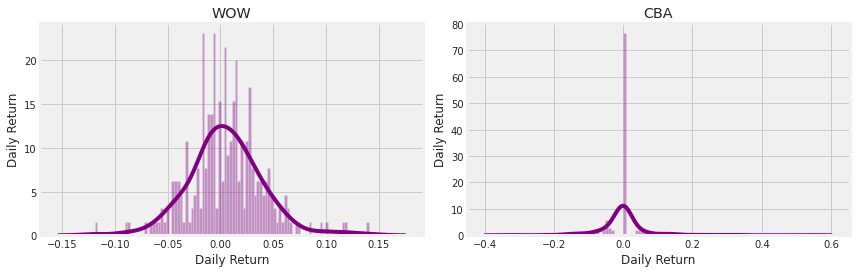

In [102]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [103]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head()

Symbols,WOW,CBA
Date,,
2020-05-18,5.20,0.150
2020-05-19,5.25,0.130
2020-05-20,5.63,0.130
2020-05-21,6.17,0.130
2020-05-22,6.13,0.165


In [104]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,WOW,CBA
Date,,
2020-05-18,NaN,NaN
2020-05-19,0.009615,-0.133333
2020-05-20,0.072381,0.000000
2020-05-21,0.095915,0.000000
2020-05-22,-0.006483,0.269231


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


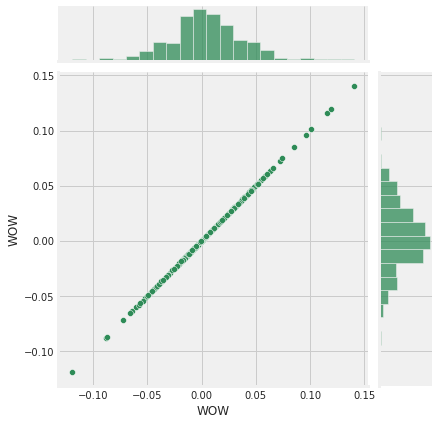

In [105]:
sns.jointplot('WOW', 'WOW', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


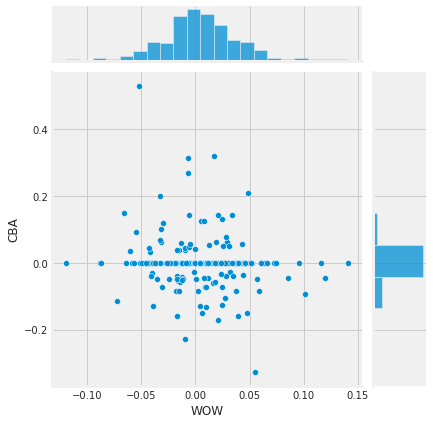

In [106]:
sns.jointplot('WOW', 'CBA', tech_rets, kind='scatter')

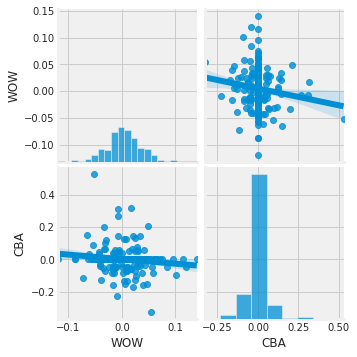

In [107]:
sns.pairplot(tech_rets, kind='reg')

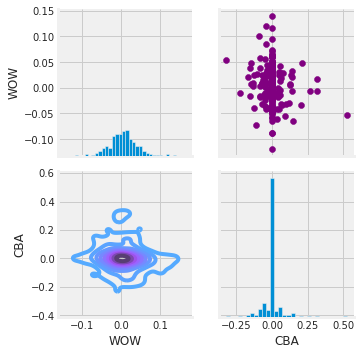

In [108]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

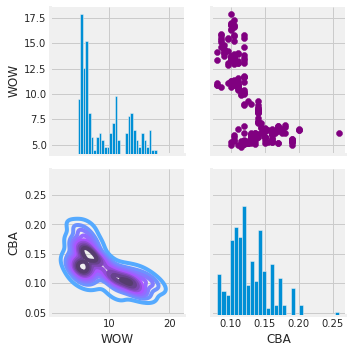

In [109]:
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

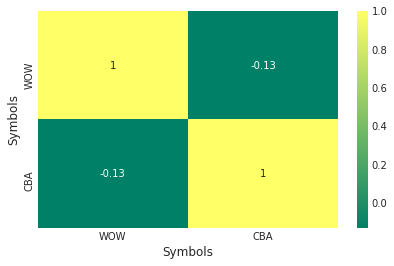

In [110]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

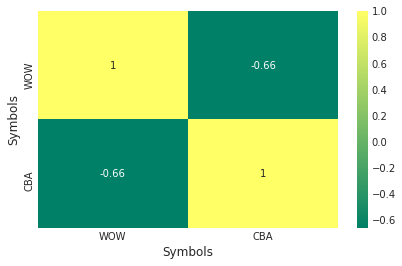

In [111]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

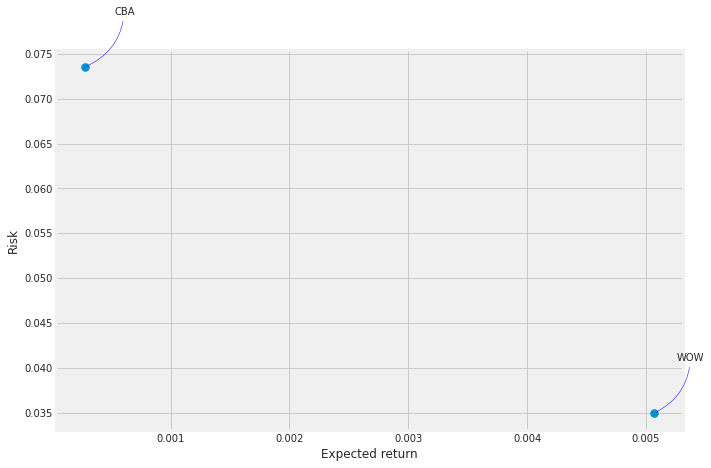

In [112]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Woolworth 

In [113]:
df = DataReader('WOW', data_source='yahoo', start='2019-12-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-02,6.130000,5.930,6.12,5.94,212700,5.94
2019-12-03,6.000000,5.750,5.90,5.98,863800,5.98
2019-12-04,6.310000,5.963,6.01,6.27,755700,6.27
2019-12-05,6.915000,6.470,6.49,6.74,668100,6.74
2019-12-06,7.030000,6.700,6.75,6.89,451500,6.89
...,...,...,...,...,...,...
2021-05-10,16.040001,15.460,15.85,15.49,188600,15.49
2021-05-11,15.390000,14.750,15.22,15.36,310200,15.36
2021-05-12,15.560000,14.610,15.31,14.66,219700,14.66


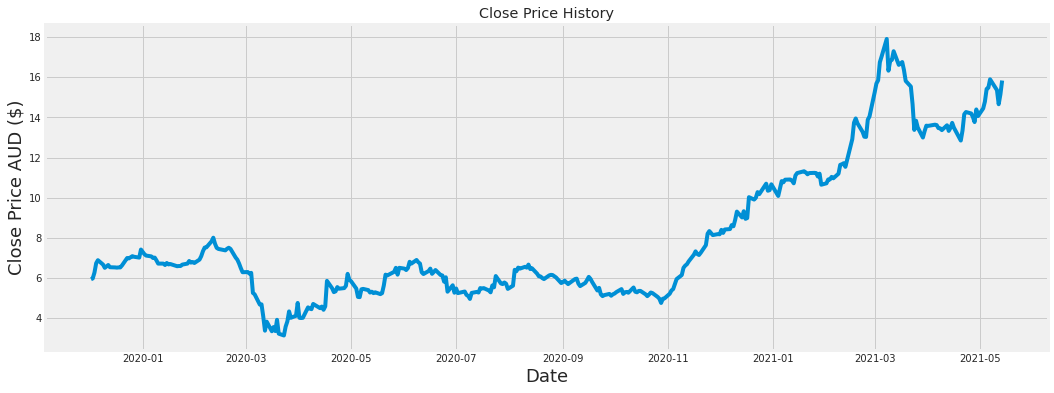

In [114]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price AUD ($)', fontsize=18)
plt.show()

In [115]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

348

In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.18957346],
       [0.19228165],
       [0.21191604],
       [0.24373729],
       [0.25389301],
       [0.23899797],
       [0.22816521],
       [0.23290453],
       [0.23764388],
       [0.23019634],
       [0.22951931],
       [0.22884224],
       [0.22951931],
       [0.22951931],
       [0.23628978],
       [0.26134055],
       [0.25998646],
       [0.267434  ],
       [0.26540284],
       [0.26269465],
       [0.28977658],
       [0.27420447],
       [0.26946512],
       [0.26675693],
       [0.26134055],
       [0.26269465],
       [0.25321598],
       [0.24238319],
       [0.24238319],
       [0.23764388],
       [0.24441435],
       [0.239675  ],
       [0.2410291 ],
       [0.23358159],
       [0.23425862],
       [0.23425862],
       [0.23899797],
       [0.24238319],
       [0.25118482],
       [0.24576845],
       [0.2477996 ],
       [0.24441435],
       [0.25592417],
       [0.267434  ],
       [0.2843602 ],
       [0.29654705],
       [0.29722412],
       [0.317

In [117]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.18957346, 0.19228165, 0.21191604, 0.24373729, 0.25389301,
       0.23899797, 0.22816521, 0.23290453, 0.23764388, 0.23019634,
       0.22951931, 0.22884224, 0.22951931, 0.22951931, 0.23628978,
       0.26134055, 0.25998646, 0.267434  , 0.26540284, 0.26269465,
       0.28977658, 0.27420447, 0.26946512, 0.26675693, 0.26134055,
       0.26269465, 0.25321598, 0.24238319, 0.24238319, 0.23764388,
       0.24441435, 0.239675  , 0.2410291 , 0.23358159, 0.23425862,
       0.23425862, 0.23899797, 0.24238319, 0.25118482, 0.24576845,
       0.2477996 , 0.24441435, 0.25592417, 0.267434  , 0.2843602 ,
       0.29654705, 0.29722412, 0.31753554, 0.32972242, 0.30941097,
       0.29519296, 0.2918077 , 0.28706839, 0.29248477, 0.29587002,
       0.2918077 , 0.26269465, 0.25524711, 0.24238319, 0.22681108])]
[0.21327013621287882]

[array([0.18957346, 0.19228165, 0.21191604, 0.24373729, 0.25389301,
       0.23899797, 0.22816521, 0.23290453, 0.23764388, 0.23019634,
       0.22951931, 0.22884224, 0.22

In [118]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
288/288 [==============================] - 12s 31ms/step - loss: 0.0126
Epoch 2/20
288/288 [==============================] - 9s 30ms/step - loss: 0.0032
Epoch 3/20
288/288 [==============================] - 9s 30ms/step - loss: 0.0047
Epoch 4/20
288/288 [==============================] - 8s 29ms/step - loss: 0.0019
Epoch 5/20
288/288 [==============================] - 8s 29ms/step - loss: 0.0013
Epoch 6/20
288/288 [==============================] - 8s 29ms/step - loss: 0.0014
Epoch 7/20
288/288 [==============================] - 8s 28ms/step - loss: 0.0015
Epoch 8/20
288/288 [==============================] - 9s 30ms/step - loss: 0.0016
Epoch 9/20
288/288 [==============================] - 8s 29ms/step - loss: 0.0011
Epoch 10/20
288/288 [==============================] - 8s 29ms/step - loss: 0.0011
Epoch 11/20
288/288 [==============================] - 8s 29ms/step - loss: 0.0013
Epoch 12/20
288/288 [==============================] - 8s 29ms/step - loss: 0.0013
Epoch 13/20


In [119]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.5467227656721303

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


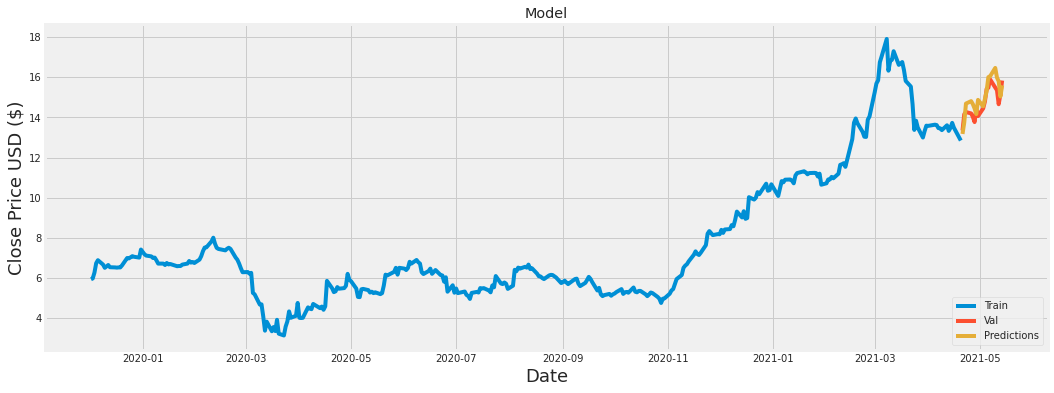

In [120]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [121]:
valid

,Close,Predictions
Date,,
2021-04-21,13.35,13.178775
2021-04-22,14.16,13.749297
2021-04-23,14.27,14.691234
2021-04-26,14.20,14.812419
2021-04-27,14.03,14.663392
2021-04-28,13.77,14.450840
2021-04-29,14.40,14.167916
2021-04-30,14.07,14.875118
2021-05-03,14.45,14.554814


# CommonWealth bank

In [122]:
CBA_df = DataReader('CBA', data_source='yahoo', start='2019-12-01', end=datetime.now())
CBA_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-02,0.150,0.150,0.150,0.150,167000.0,0.150
2019-12-03,0.145,0.145,0.145,0.145,1500.0,0.145
2019-12-04,0.135,0.135,0.135,0.135,10000.0,0.135
2019-12-05,0.140,0.140,0.140,0.140,4000.0,0.140
2019-12-06,0.140,0.120,0.140,0.120,15000.0,0.120
...,...,...,...,...,...,...
2021-05-10,0.085,0.085,0.085,0.085,500.0,0.085
2021-05-11,0.085,0.085,0.085,0.085,0.0,0.085
2021-05-12,0.085,0.085,0.085,0.085,0.0,0.085


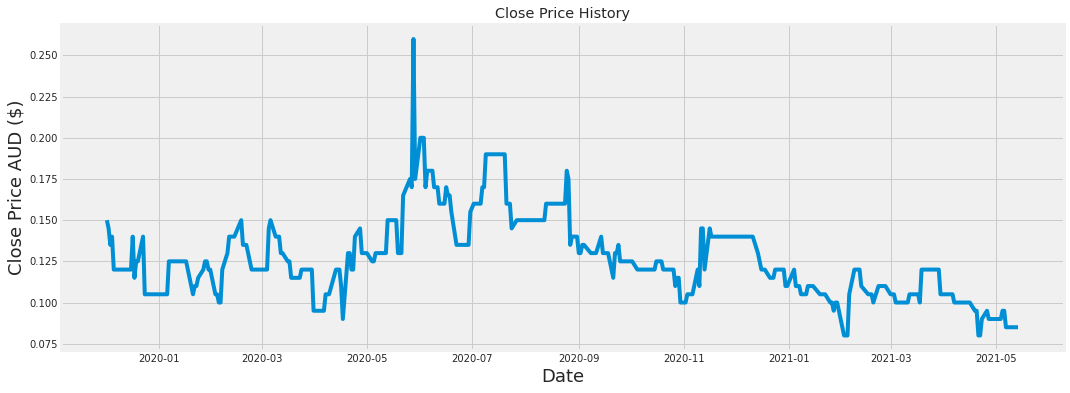

In [123]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(CBA_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price AUD ($)', fontsize=18)
plt.show()

In [124]:
data = CBA_df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

343

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.38888895],
       [0.36111111],
       [0.30555561],
       [0.33333336],
       [0.22222223],
       [0.22222223],
       [0.22222223],
       [0.22222223],
       [0.22222223],
       [0.22222223],
       [0.22222223],
       [0.33333336],
       [0.19444447],
       [0.25000002],
       [0.25000002],
       [0.33333336],
       [0.13888889],
       [0.13888889],
       [0.13888889],
       [0.13888889],
       [0.13888889],
       [0.13888889],
       [0.13888889],
       [0.25000002],
       [0.25000002],
       [0.25000002],
       [0.25000002],
       [0.25000002],
       [0.25000002],
       [0.25000002],
       [0.25000002],
       [0.25000002],
       [0.13888889],
       [0.16666668],
       [0.16666668],
       [0.19444447],
       [0.22222223],
       [0.25000002],
       [0.25000002],
       [0.22222223],
       [0.22222223],
       [0.13888889],
       [0.13888889],
       [0.11111113],
       [0.11111113],
       [0.22222223],
       [0.27777777],
       [0.333

In [126]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.38888895, 0.36111111, 0.30555561, 0.33333336, 0.22222223,
       0.22222223, 0.22222223, 0.22222223, 0.22222223, 0.22222223,
       0.22222223, 0.33333336, 0.19444447, 0.25000002, 0.25000002,
       0.33333336, 0.13888889, 0.13888889, 0.13888889, 0.13888889,
       0.13888889, 0.13888889, 0.13888889, 0.25000002, 0.25000002,
       0.25000002, 0.25000002, 0.25000002, 0.25000002, 0.25000002,
       0.25000002, 0.25000002, 0.13888889, 0.16666668, 0.16666668,
       0.19444447, 0.22222223, 0.25000002, 0.25000002, 0.22222223,
       0.22222223, 0.13888889, 0.13888889, 0.11111113, 0.11111113,
       0.22222223, 0.27777777, 0.33333336, 0.33333336, 0.33333336,
       0.33333336, 0.38888895, 0.30555561, 0.30555561, 0.30555561,
       0.22222223, 0.22222223, 0.22222223, 0.22222223, 0.22222223])]
[0.22222222682134618]

[array([0.38888895, 0.36111111, 0.30555561, 0.33333336, 0.22222223,
       0.22222223, 0.22222223, 0.22222223, 0.22222223, 0.22222223,
       0.22222223, 0.33333336, 0.19

In [127]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.006192718808144709

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


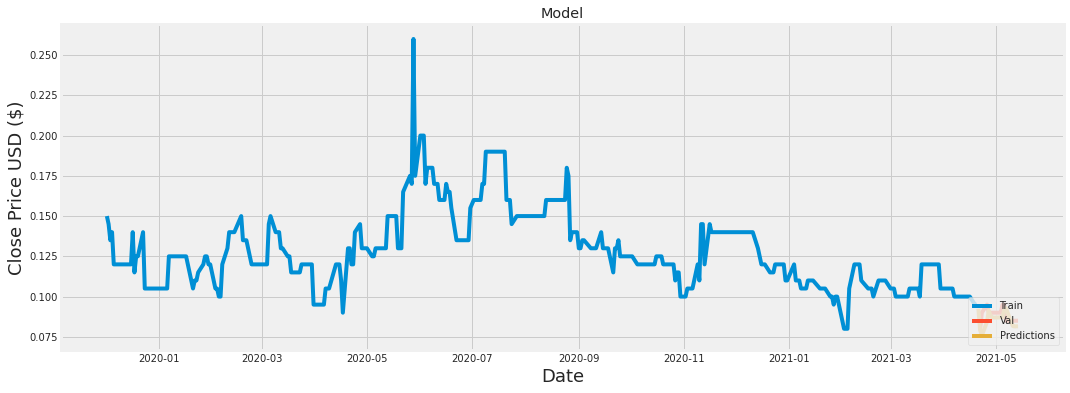

In [128]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [130]:
valid

,Close,Predictions
Date,,
2021-04-21,0.080,0.092412
2021-04-22,0.080,0.079203
2021-04-23,0.090,0.075842
2021-04-26,0.095,0.084295
2021-04-27,0.090,0.091260
2021-04-28,0.090,0.088207
2021-04-29,0.090,0.087076
2021-04-30,0.090,0.086939
2021-05-03,0.090,0.087047
